## Spatial Autocorrelation of Entropy

In [37]:
import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
# load entropy data
entropy = gp.read_file('C:/users/becky/documents/thesis/ent_map.shp')
# load weight gal file
#gal = pysal.open('C:/users/becky/documents/acs_research/C_results/19740/19740_hous_trials/19740_hous789_weights_matrix.gal')
#w = gal.read()
#gal.close()
#w.n
#entropy = entropy.dropna(subset=['entropy'])
w = ps.queen_from_shapefile('C:/users/becky/documents/thesis/ent_map.shp', idVariable='GEOID')



Island id:  [612]


In [3]:
ent = np.array(entropy['entropy'].values)
ent = np.nan_to_num(ent)

In [4]:
mi = ps.Moran(ent, w)
gc = ps.Geary(ent, w)

In [17]:
print "Moran's I is " + str(mi.I)
print mi.EI
print mi.VI_norm
print mi.seI_norm
print mi.z_norm
print mi.p_norm

Moran's I is 0.0409476715235
-0.00161290322581
0.000514957586325
0.0226926769317
1.87552023402
0.0607211885072


## Local spatial autocorrelation of Entropy
#### Using Local Moran's I

In [18]:
lm = ps.Moran_Local(ent, w)

In [19]:
lm.n

621

In [20]:
lm.p_sim

array([ 0.046,  0.004,  0.08 ,  0.048,  0.357,  0.324,  0.061,  0.134,
        0.493,  0.382,  0.301,  0.266,  0.319,  0.315,  0.474,  0.451,
        0.318,  0.404,  0.335,  0.123,  0.477,  0.003,  0.301,  0.409,
        0.157,  0.324,  0.222,  0.4  ,  0.42 ,  0.019,  0.252,  0.335,
        0.398,  0.288,  0.314,  0.082,  0.29 ,  0.12 ,  0.361,  0.201,
        0.095,  0.396,  0.471,  0.182,  0.492,  0.109,  0.326,  0.144,
        0.425,  0.384,  0.433,  0.028,  0.182,  0.287,  0.149,  0.269,
        0.498,  0.349,  0.278,  0.147,  0.073,  0.221,  0.384,  0.155,
        0.483,  0.447,  0.339,  0.305,  0.387,  0.183,  0.246,  0.357,
        0.454,  0.474,  0.489,  0.187,  0.441,  0.324,  0.24 ,  0.149,
        0.404,  0.248,  0.217,  0.202,  0.439,  0.497,  0.371,  0.394,
        0.295,  0.151,  0.268,  0.367,  0.393,  0.378,  0.407,  0.478,
        0.196,  0.226,  0.099,  0.143,  0.28 ,  0.186,  0.111,  0.311,
        0.244,  0.487,  0.385,  0.138,  0.294,  0.244,  0.238,  0.395,
      

In [28]:
sig = lm.p_sim<0.05
lm.p_sim[sig]
lm.q[sig]

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 3, 1, 2, 1, 4, 4,
       1, 4, 4, 4, 1, 3, 3, 1, 1, 1, 1, 4, 1, 2, 1, 4, 3, 3, 1, 1, 1, 2, 1,
       2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 4, 1, 1, 3,
       3, 2, 1, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3])

In [29]:
from pysal.contrib.viz import mapping as maps

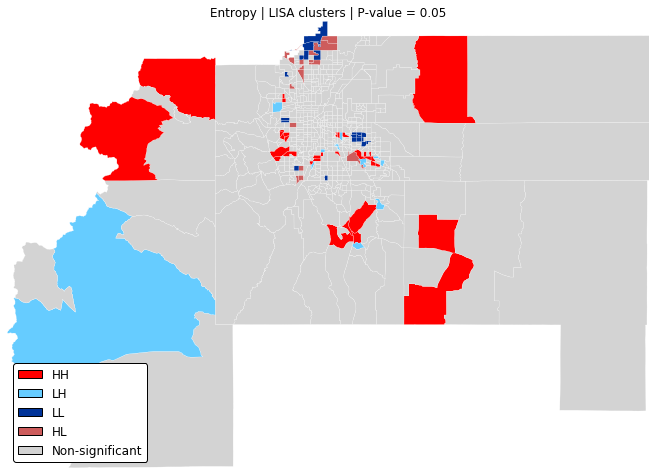

In [47]:
shp_link = 'C:/users/becky/documents/thesis/ent_map.shp'
#_ = maps.plot_lisa_cluster(shp_link, lm, figsize=(9,6))
orig_crs = ccrs.PlateCarree()
projection = ccrs.Mercator()
p_thres = 0.05

shp = ps.open(shp_link)
polys = maps.map_poly_shp(shp)
polys = maps.base_lisa_cluster(polys, lm, p_thres=p_thres)
polys.set_edgecolor('1')
polys.set_linewidth(0.2)
polys.set_transform(orig_crs)

f = plt.figure(figsize=(12, 8))

ax = plt.axes(projection=projection)
extent = [shp.bbox[0], shp.bbox[2], shp.bbox[1], shp.bbox[3]]
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_collection(polys)
ax.outline_patch.set_visible(False)

boxes, labels = maps.lisa_legend_components(lm, p_thres=p_thres)
plt.legend(boxes, labels, loc='lower left', fancybox=True)

plt.title('Entropy | LISA clusters | P-value = %.2f'%p_thres)

plt.show()

## Spatial Autocorrelation of CV